<a href="https://colab.research.google.com/github/gurleenk01/python/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#To find the relation btw mpg and everything

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/car-mpg.csv')

In [3]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
df.shape

(398, 10)

In [6]:
df.drop("car_name",axis=1,inplace=True)

In [7]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [9]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,America,0
1,15.0,8,350.0,165,3693,11.5,70,America,0
2,18.0,8,318.0,150,3436,11.0,70,America,0
3,16.0,8,304.0,150,3433,12.0,70,America,0
4,17.0,8,302.0,140,3449,10.5,70,America,0


In [10]:
df=pd.get_dummies(df,columns=['origin'])

In [11]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [14]:
hpDigit=pd.DataFrame(df.hp.str.isdigit())

In [15]:
df[hpDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe


In [16]:
df['hp']=df['hp'].replace('?',np.nan)
df['hp']=df['hp'].astype(float)

In [18]:
median1=df['hp'].median()
median1

93.5

In [19]:
df['hp'].replace(np.nan,median1,inplace=True)

In [21]:
df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [22]:
duplicate=df.duplicated()

In [23]:
duplicate.sum()

0

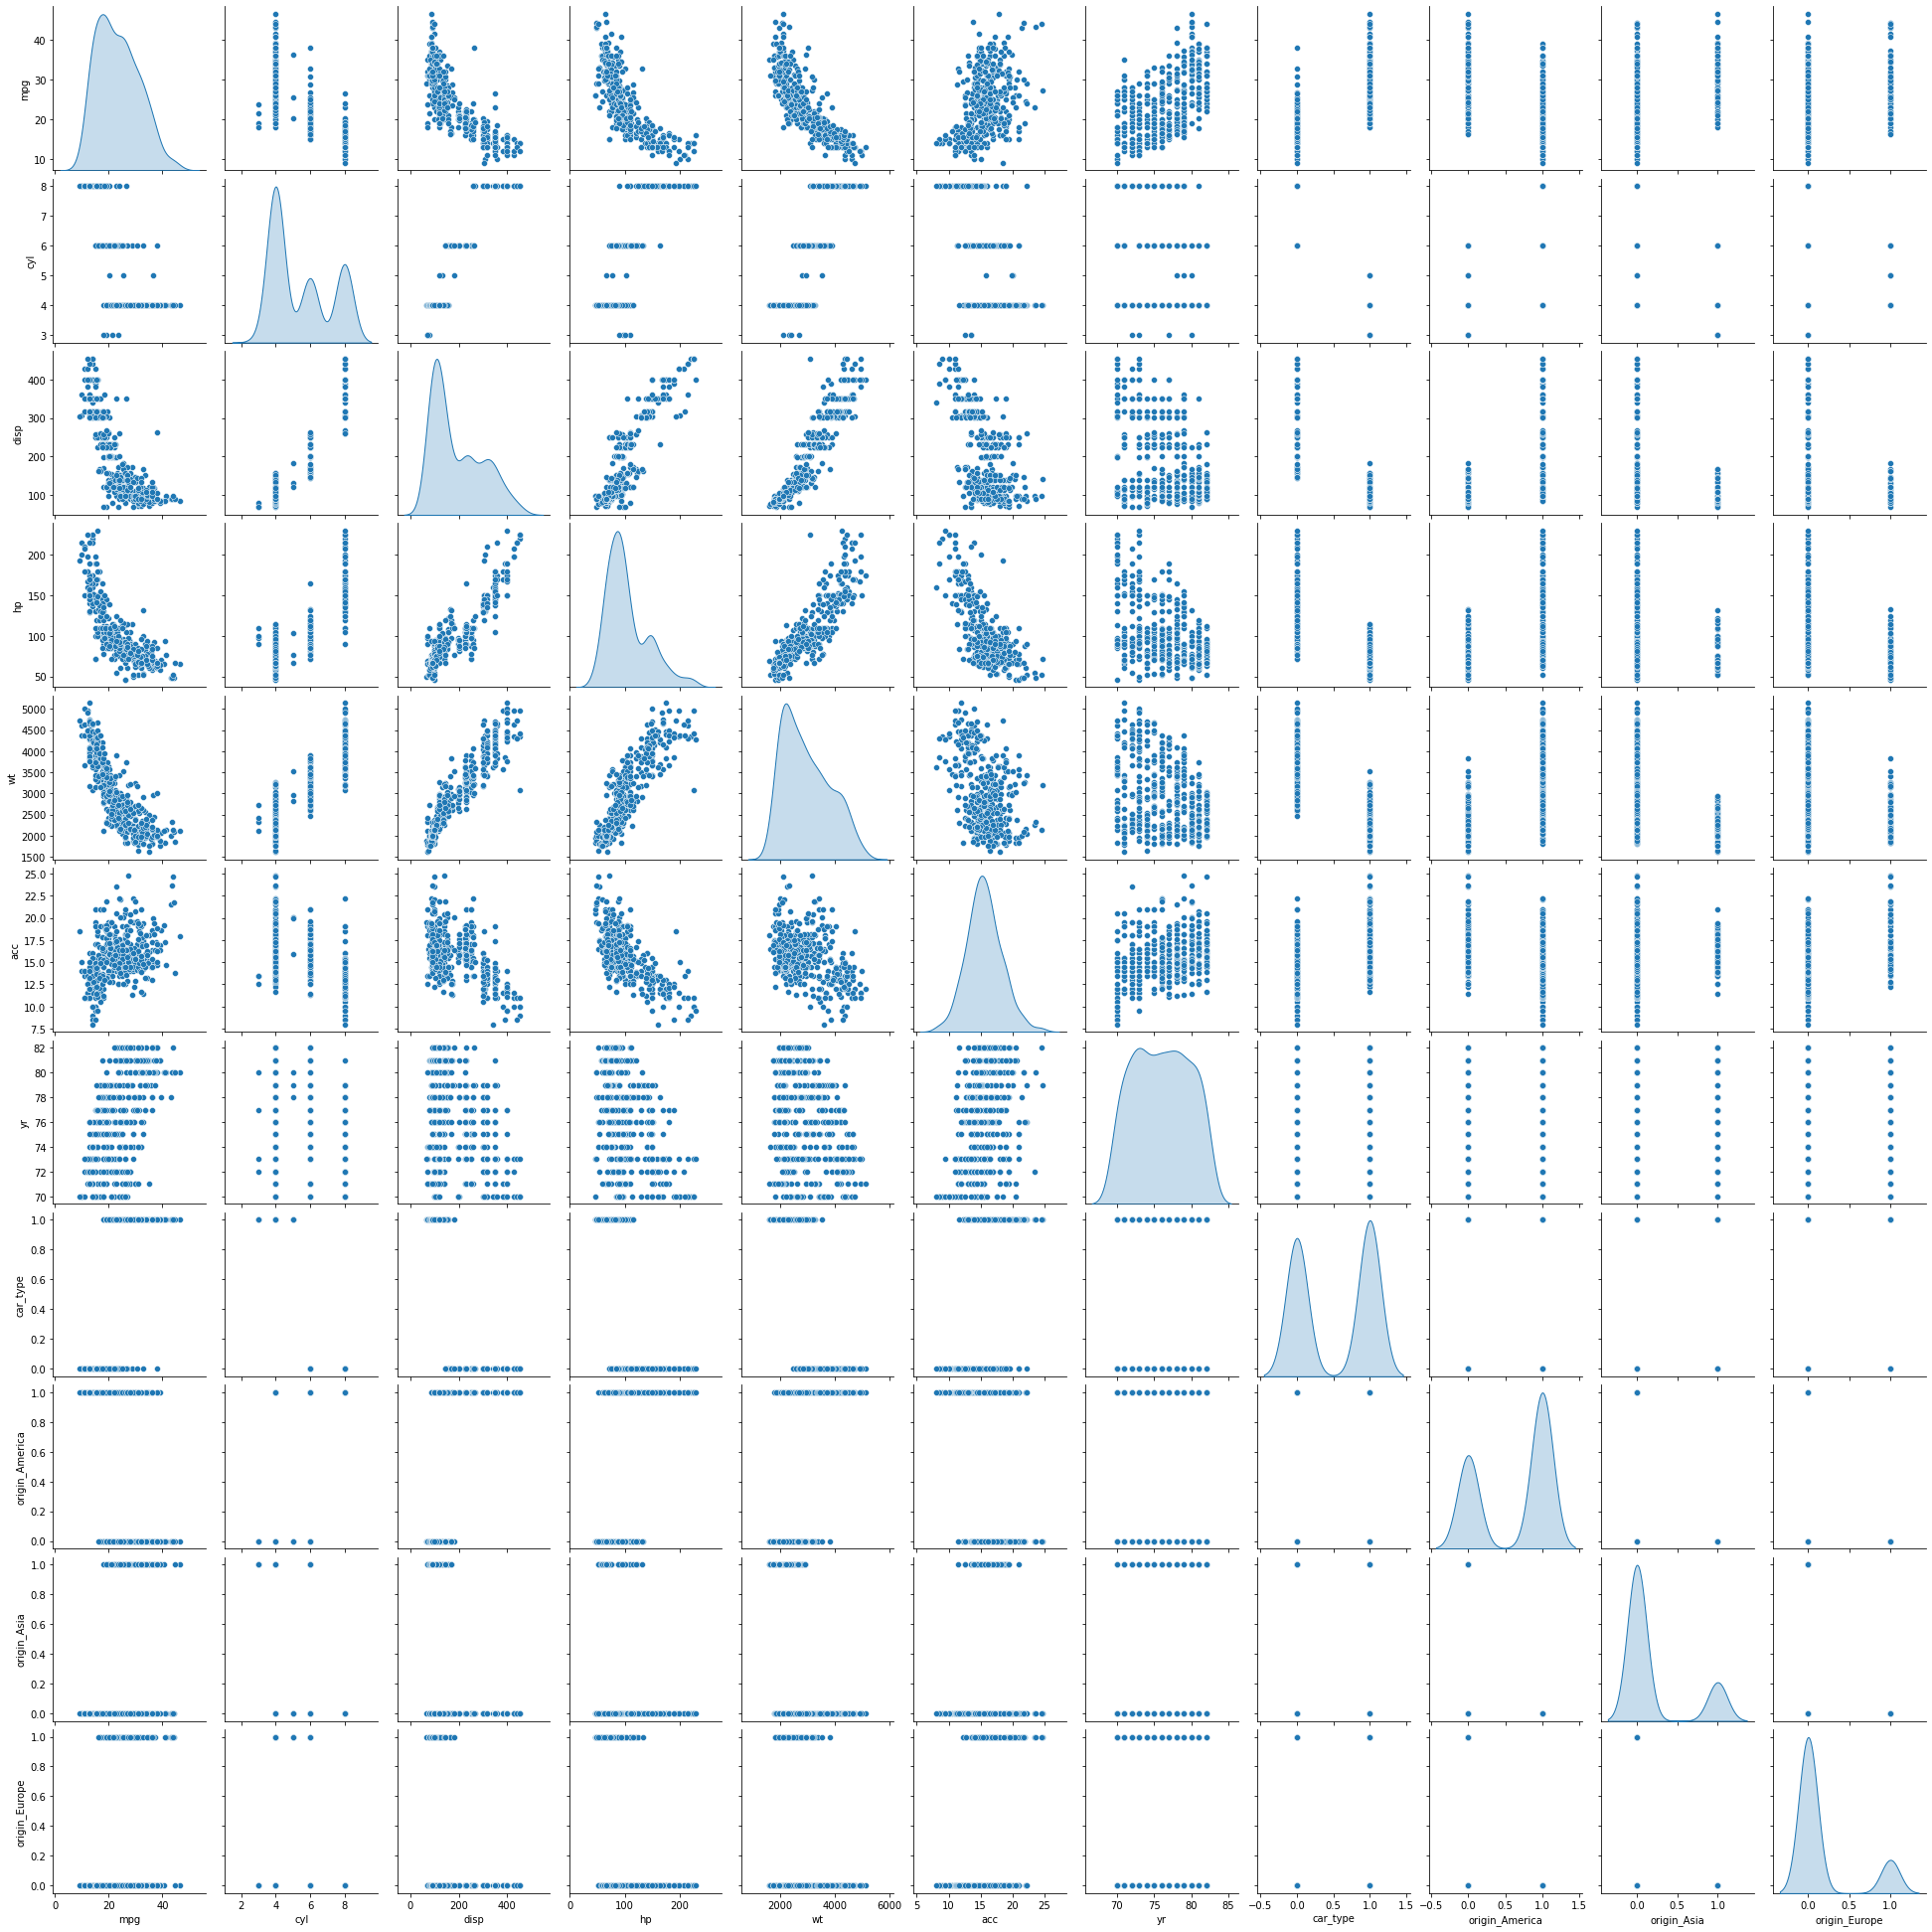

In [24]:
sns.pairplot(df,diag_kind='kde')

In [26]:
 X=df.drop(['mpg'],axis=1)

In [27]:
y=df[{'mpg'}]

In [30]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
# fit linear model

In [34]:
model1=LinearRegression()
##fit with train data
model1.fit(X_train,y_train)

LinearRegression()

In [37]:
model1.score(X_train,y_train)

0.8343770256960538

In [38]:
model1.score(X_test,y_test)

0.8513421387780062